# EM 算法

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

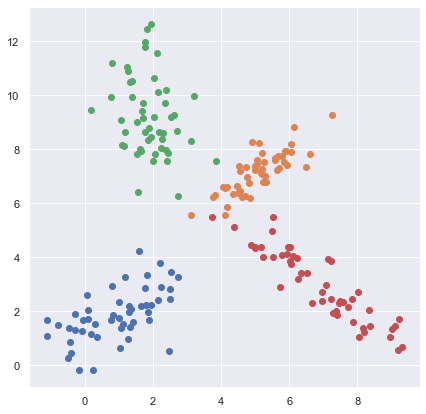

In [2]:
# 制作一个用于聚类的数据集 多元正态
fig = plt.figure(figsize=(7,7))

X = []
means = [(1,2),(5,7),(2,9),(7,3)]
covs = [((1.5,0.7),(0.7,1.2)),((0.6,0.5),(0.5,0.6)),((0.5,-0.4),(-0.4,2.0)),((1.5,-1.2),(-1.2,1.3))]
for i in range(4):
    x = np.random.multivariate_normal(means[i],covs[i],50)
    
    plt.scatter(x[:,0],x[:,1]);
    
    X.append(x)
X = np.concatenate(X)

## 推导：

对于一个存在隐变量 $z_i$ 的问题，其最大对数似然函数如下，
$$
\hat \theta,\hat z=\arg \max_{\theta,z}\sum_{i=1}^nlog\sum_{z_i}P(x_i,z_i|\theta)
$$

$$
\begin{align}
\sum_{i=1}^nlog\sum_{z_i}p(x_i,z_i;\theta)&=\sum_{i=1}^nlog\sum_{z_i}Q_i(z_i)\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}\\
&\ge\sum_{i=1}^n\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}
\end{align}
$$

其中 $Q_i(z_i)$ 为某种概率分布，$\sum_{z_i}Q_i(z_i)=1$

EM 算法每次都尽可能抬高下限 $\sum_{i=1}^n\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}$ ，所以希望等号成立。根据 Jensen 不等式，等号仅当 $\frac{P(x_i,z_i|\theta)}{Q_i(z_i)}=c$ 时成立，所以
$$
\begin{align}
cQ_i(z_i)&=P(z_i,x_i|\theta) \\ \\
c\sum_zQ_i(z_i)&=\sum_zP(z_i,x_i|\theta) \\ \\
\Rightarrow c &=\sum_zP(z_i,x_i|\theta)
\end{align}
$$

因此，
$$
\begin{align}
Q_i(z_i) &= \frac{P(x_i,z_i|\theta)}{c} \\ \\
&= \frac{P(x_i,z_i|\theta)}{\sum_zP(z_i,x_i|\theta)} \\ \\
&= \frac{P(x_i,z_i|\theta)}{P(x_i|\theta)} \\ \\
&= P(z_i|x_i,\theta)
\end{align}
$$

这称为 联合分布

## 流程：

观察数据 $x=(x_1,\dots,x_N)$ ，最大迭代次数 $J$

1 随机初始化模型参数 $\theta^0$

2 **For j = 0 , ... , J-1:**

​	**E步**：计算联合分布的条件概率期望
$$
Q_i(z_i):=P(z_i|x_i,\theta^j)
$$
​	**M步**：极大化 $L(\theta)$，得到 $\theta$
$$
\theta^{j+1}=\arg\max_\theta \sum_{i=1}^n\sum_{z_i}Q_i(z_i)logP(x_i,z_i|\theta)
$$
3 输出：模型参数 $\theta$ 

## 证明 - 收敛性：

EM 算法能保证收敛吗？这一问题即证明：对于任意 $0\le j<J$ ，都有


$$
\sum_{i=1}^nlogP(x_i|\theta^{j+1})\ge\sum_{i=1}^nlogP(x_i|\theta^{j})
$$
证明：

令：
$$
\begin{align}
L(\theta,\theta^j) &= \sum_{i=1}^n\sum_{z_i}P(z_i|x_i,\theta^j)logP(x_i,z_i|\theta) \\ \\
H(\theta,\theta^j) &= \sum_{i=1}^n\sum_{z_i}P(z_i|x_i,\theta^j)logP(z_i|x_i,\theta)
\end{align}
$$

两式相减，得：
$$
\sum_{i=1}^nlogP(x_i|\theta) = L(\theta,\theta^j) - H(\theta,\theta^j)
$$

在上式中分别取 $\theta$ 为 $\theta^j$ 和 $\theta^{j+1}$ ，相减，得：


$$
\sum_{i=1}^nlogP(x_i|\theta^{j+1})-\sum_{i=1}^nlogP(x_i|\theta^{j}) =  [L(\theta^{j+1},\theta^j)-L(\theta^j,\theta^j)] - [H(\theta^{j+1},\theta^j)-H(\theta^j,\theta^j)]
$$

因此只要证明右式大于等于 0 即可，

由于 $\theta^{j+1}=\arg\max_\theta L(\theta,\theta^j)$ ，所以 $L(\theta^{j+1},\theta^j)-L(\theta^j,\theta^j)\ge0$

对于第二部分，则有：
$$
\begin{align}
H(\theta^{j+1},\theta^j)-H(\theta^j,\theta^j) &= \sum_{i=1}^n\sum_{z_i}P(z_i|x_i,\theta^j)log\frac{P(z_i|x_i,\theta^{j+1})}{P(z_i|x_i,\theta^{j})} \\ \\
&\le \sum_{i=1}^nlog\sum_{z_i}P(z_i|x_i,\theta^j)\frac{P(z_i|x_i,\theta^{j+1})}{P(z_i|x_i,\theta^{j})} \\ \\
&= \sum_{i=1}^nlog\sum_{z_i} P(z_i|x_i,\theta^{j+1}) = \sum_{i=1}^nlog1=0
\end{align}
$$

因此，得证
$$
\sum_{i=1}^nlogP(x_i|\theta^{j+1})\ge\sum_{i=1}^nlogP(x_i|\theta^{j})
$$


EM 算法能保证收敛（但不一定是全局最优）

## 应用

### K-means

$\theta=(\mu_{z_1},...,\mu_{z_k})$ 为一组质心

E步：

$P(z_i|x_i,\theta^j)=\cases{
1,\text{ if } z_i = \arg\min_{z} ||x_i-\mu_{z_i}||^2\\
0,\text{ else }
}$

M步：

$
P(x_i,z_i|\theta) = ae^{-||x_i-\mu_{z_i}||^2}
$

其中 $a$ 是某个常数使得其符合概率定义

$
\Rightarrow \mu_{z_i}^{j+1} = \frac{\sum_x x_iP(z_i|x_i,\theta^j)}{\sum_x P(z_i|x_i,\theta^j)}
$

因此 K-means 可以当作在 E 环节使用最大原则，而协方差矩阵固定为单位阵的高斯混合模型

In [3]:
maxIter = 6
nClusters = 4

In [4]:
def dist(x,y):
    return ((x-y)**2).sum(axis=-1)

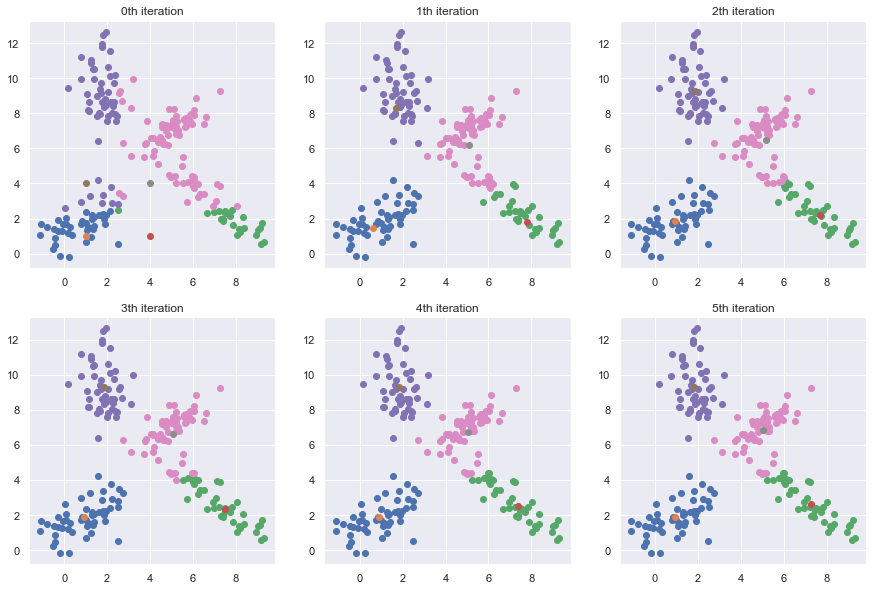

In [5]:
from math import ceil

theta = np.array(((1, 1), (4, 1), (1, 4), (4, 4)))

fig, axs = plt.subplots(ceil(maxIter/3), 3, figsize=(15, ceil(maxIter/3)*5))
axs = axs.flatten()

for i in range(maxIter):
    # E
    z = np.argmin(dist(X, theta.reshape(nClusters, 1, -1)), axis=0)

    for j in range(nClusters):
        axs[i].scatter(X[z == j, 0], X[z == j, 1])
        axs[i].scatter(theta[j, 0], theta[j, 1])
        axs[i].set_title(f"{i}th iteration")
    # M
    theta = np.array(
        [(X[z == i].sum(axis=0)) / (z == i).sum() for i in range(nClusters)]
    )
    
theta_good = theta

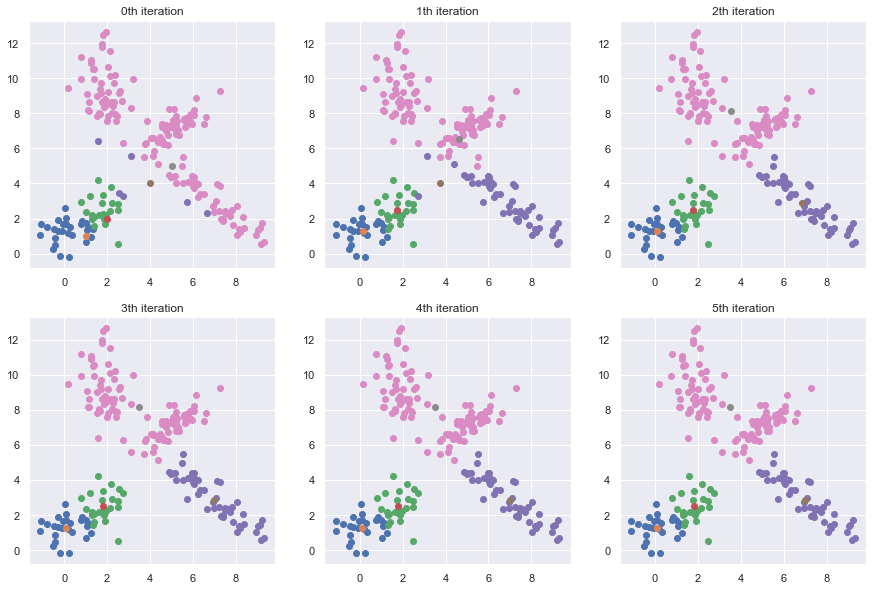

In [6]:
# k-means(EM算法) 对初值敏感，初值会影响最终结果，导致其陷入局部最优
theta = np.array(((1, 1), (2, 2), (4, 4), (5, 5)))

fig, axs = plt.subplots(ceil(maxIter/3), 3, figsize=(15, ceil(maxIter/3)*5))
axs = axs.flatten()

for i in range(maxIter):
    # E
    z = np.argmin(dist(X, theta.reshape(nClusters, 1, -1)), axis=0)

    for j in range(nClusters):
        axs[i].scatter(X[z == j, 0], X[z == j, 1])
        axs[i].scatter(theta[j, 0], theta[j, 1])
        axs[i].set_title(f"{i}th iteration")
    # M
    theta = np.array(
        [(X[z == i].sum(axis=0)) / (z == i).sum() for i in range(nClusters)]
    )

In [7]:
def Kmeans(X, theta0, maxIter=6, nClusters=4):
    for i in range(maxIter):
        # E
        z = np.argmin(dist(X, theta.reshape(nClusters, 1, -1)), axis=0)
        # M
        theta = np.array(
            [(X[z == i].sum(axis=0)) / (z == i).sum() for i in range(nClusters)]
        )
    return z,theta

### 高斯混合模型

多元高斯分布：
$$
\def\bm{\boldsymbol}
\aleph(\bm x|\bm \mu,\bm \Sigma) = \frac{1}{(2\pi)^{{M}/{2}}|\bm \Sigma|^{{1}/{2}}}\exp\left[-\frac{1}{2}(\bm x-\bm \mu)^T \bm\Sigma^{-1}(\bm x-\bm \mu)\right]
$$

混合高斯分布：
$$
P(\bm x) = \sum_k \pi_k \aleph(\bm x|\bm \mu_k,\bm \Sigma_l)
$$

其中 $\pi_k$ 为混合系数，$\sum_k\pi_k=1$

模型参数

$\theta = ((\bm\mu_1,\bm\Sigma_1,\pi_1),...,(\bm\mu_K,\bm\Sigma_K,\pi_k))$

**E步**：

$$
P(z_i|\bm x_i,\theta^j) = \frac {\pi_{z_i}\aleph(\bm x_i|\bm \mu_{z_i},\bm \Sigma_{z_i})} {\sum_z \pi_z\aleph(\bm x_z|\bm \mu_z,\bm \Sigma_z)}
$$

**M步**：
$$
\theta^{j+1}=\arg\max_\theta \sum_{i=1}^n\sum_{z_i}Q_i(z_i)logP(x_i,z_i|\theta)
$$

求导得，
$$
\mu_{z_i} = \frac{\sum_i^NP(z_i|\bm x_i,\theta^j)\bm x_i}{\sum_j^NP(z_i|\bm x_i,\theta^j)}
$$


$$
\bm \Sigma_{z_i}= \frac{\sum_i^NP(z_i|\bm x_i,\theta^j)(\bm x_i-\bm\mu_k)(\bm x_i-\bm\mu_k)^T}{\sum_j^NP(z_i|\bm x_i,\theta^j)}
$$


$$
\pi_{z_i} = \frac{\sum_j^NP(z_i|\bm x_i,\theta^j)}{N}
$$

In [8]:
def multiGauss(X, mu, cov):
    ans = 1 / (2 * np.pi) ** (0.5 * len(mu)) / np.linalg.det(cov) ** 0.5
    tmp = -0.5*np.array([((x - mu).reshape(1,-1) @ np.linalg.inv(cov) @ (x - mu).reshape(-1,1)).item() for x in X])
    tmp = np.clip(tmp, a_min=None, a_max=30)
    ans = ans * np.exp(tmp)
    return ans

In [9]:
maxIter = 6
nClusters = 4

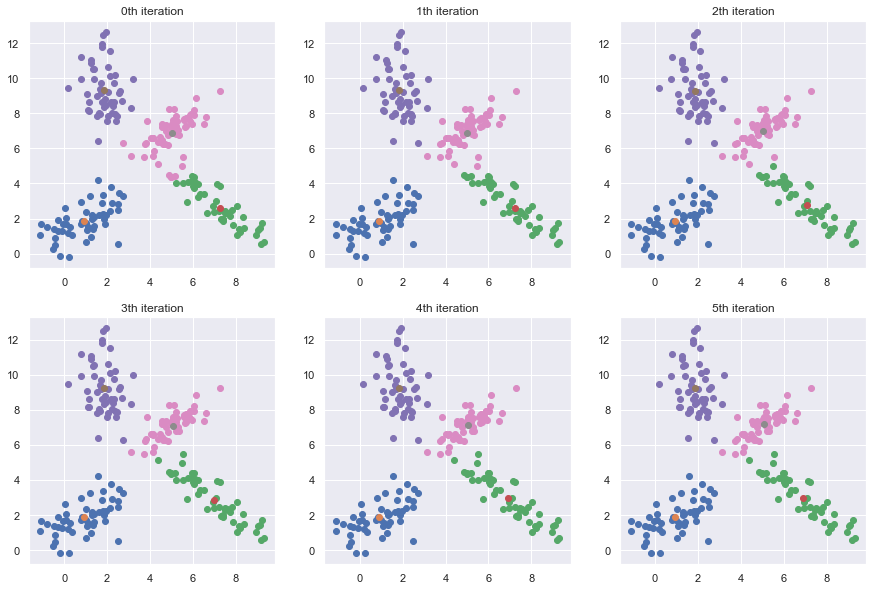

In [10]:
mus = theta_good # 由于混合高斯模型计算比较复杂，所以多以 K-means 算法来初始化
covs = np.array([((1., 0), (0., 1.)) for i in range(nClusters)])
pis = np.array([1 / nClusters for i in range(nClusters)])

fig, axs = plt.subplots(ceil(maxIter/3), 3, figsize=(15, ceil(maxIter/3)*5))
axs = axs.flatten()

for i in range(maxIter):
    # E步
    Qzx = np.array([pis[z] * multiGauss(X, mus[z], covs[z]) for z in range(nClusters)])
    n = Qzx
    Qzx = Qzx / Qzx.sum(axis=0)
    
    z = np.argmax(Qzx,axis=0)
    for j in range(nClusters):
        axs[i].scatter(X[z == j, 0], X[z == j, 1])
        axs[i].scatter(mus[j, 0], mus[j, 1])
        axs[i].set_title(f"{i}th iteration")
    
    # M步
    for z in range(nClusters):
        Qsum = Qzx[z].sum()
        mus[z] = (Qzx[z].reshape(-1, 1) * X).sum(axis=0) / Qsum
        tmp = X - mus[z]
        tmp = tmp.reshape(len(X),-1,1)@tmp.reshape(len(X),1,-1)
        covs[z] = (Qzx[z].reshape(-1, 1, 1) * tmp).sum(axis=0)/Qsum
        pis[z] = Qsum / len(X)

混合高斯模型考虑的分布的方差，在边界明显更加准确（原始数据分布为高斯分布的情况）